In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import LucaM185 
device = torch.device("cuda:0")
#device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")


In [2]:
with open("datasets/enwik8", "r") as f:
    load = f.read()[:1000000]
print(load[:200])

<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.3/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.3/ http://www.mediawiki.org/


In [3]:
class MyInputs:
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.data) - self.sequence_length
        
    def __getitem__(self, idx):
        start_indices = idx.unsqueeze(1) + torch.arange(self.sequence_length)
        return self.data[start_indices]


In [4]:
# Restricting to ASCII characters
texttoint = {chr(i): i for i in range(256)}
inttotext = {i: chr(i) for i in range(256)}
dataset = torch.tensor([texttoint[c] for c in load if c in texttoint])

vocab_size = len(texttoint)
sequence_length = 20
val_set = int(len(dataset)*0.1)

inputs = MyInputs(dataset[val_set:-1-sequence_length], sequence_length)
labels = MyInputs(dataset[val_set+1:-sequence_length], sequence_length)
val_inputs = MyInputs(dataset[:val_set], sequence_length)
val_labels = MyInputs(dataset[1:val_set+1], sequence_length)

print(len(dataset))

997275


Millions of parameters: 1.98
Epoch ___0 - Loss: 6.045 - Val Loss: 5.799
Epoch _100 - Loss: 2.552 - Val Loss: 2.543
Epoch _200 - Loss: 2.271 - Val Loss: 2.298
Epoch _300 - Loss: 2.130 - Val Loss: 2.083
Epoch _400 - Loss: 2.035 - Val Loss: 2.081
Epoch _500 - Loss: 1.949 - Val Loss: 2.042
Epoch _600 - Loss: 1.880 - Val Loss: 1.976
Epoch _700 - Loss: 1.852 - Val Loss: 1.882
Epoch _800 - Loss: 1.797 - Val Loss: 1.966
Epoch _900 - Loss: 1.765 - Val Loss: 1.898


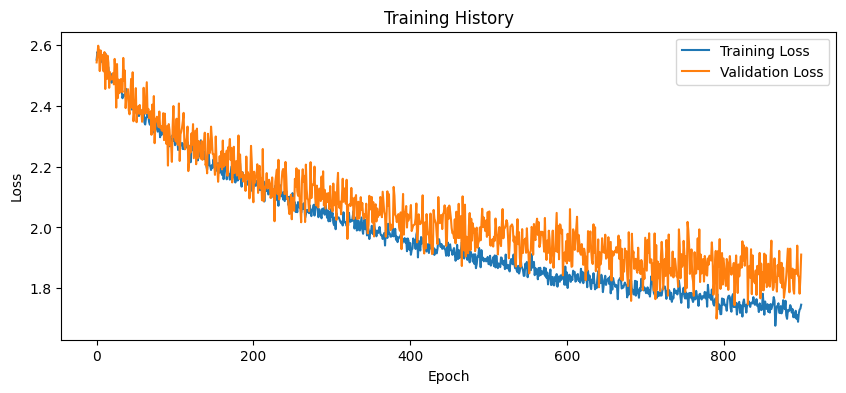

AttributeError: 'slice' object has no attribute 'unsqueeze'

In [9]:
from base_transformer import BaseTransformer, train_model, plot_training_history

# Create model with default components (uses DefaultAttention and DefaultFullyConnected)
model = BaseTransformer(
    vocab_size=vocab_size,
    emb_size=256,
    sequence_length=sequence_length,
    n_blocks=4
)

# Or create model with custom components
model = BaseTransformer(
    vocab_size=vocab_size,
    emb_size=256,
    sequence_length=sequence_length,
    n_blocks=4,
    attention_class=None,        # Optional: use your custom attention
    fc_class=None,                      # Optional: use your custom FC
    attention_kwargs={},  # Whatever your attention needs
    fc_kwargs={'hidden_size': 256, 'n_layers': 2}      # Whatever your FC needs
)

# Train it
history = train_model(
    model, inputs, labels, val_inputs, val_labels, vocab_size,
    epochs=1000, batch_size=1024, device=device
)

# Plot results
plot_training_history(history)

# For inference with cached models:
model.reset_cache()  # Reset before inference
model.eval()
with torch.no_grad():
    output = model(inputs[:30], autoregressive=True)


In [ ]:
from base_transformer import BaseTransformer, train_model, plot_training_history

# Create model with default components (uses DefaultAttention and DefaultFullyConnected)
model = BaseTransformer(
    vocab_size=vocab_size,
    emb_size=256,
    sequence_length=sequence_length,
    n_blocks=4
)

# Or create model with custom components
model = BaseTransformer(
    vocab_size=vocab_size,
    emb_size=256,
    sequence_length=sequence_length,
    n_blocks=4,
    attention_class=None,        # Optional: use your custom attention
    fc_class=None,                      # Optional: use your custom FC
    attention_kwargs={'heads': 8, 'cache_len': 2048},  # Whatever your attention needs
    fc_kwargs={'hidden_size': 256, 'n_layers': 2}      # Whatever your FC needs
)

# Train it
history = train_model(
    model, inputs, labels, val_inputs, val_labels, vocab_size,
    epochs=1000, batch_size=1024, device=device
)

# Plot results
plot_training_history(history)

# For inference with cached models:
model.reset_cache()  # Reset before inference
model.eval()
with torch.no_grad():
    output = model(inputs[:30], autoregressive=True)
